In [2]:
!pip install cx_oracle

In [3]:
import cx_Oracle

dsn = cx_Oracle.makedsn('localhost',1521,'xe')
dsn

'(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))'

In [4]:
db = cx_Oracle.connect('C##CAKD5','CAKD5',dsn)
db

<cx_Oracle.Connection to C##CAKD5@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))>

In [5]:
import pandas as pd
cursor = db.cursor()
cursor.execute('select * from book')
x = cursor.fetchall()
columns = ['BOOKID','BOOKNAME','PUBLISHER','PRICE']
df = pd.DataFrame(x, columns = columns)
df.head()

,BOOKID,BOOKNAME,PUBLISHER,PRICE
0,1,축구의 역사,굿스포츠,7000
1,2,축구아는 여자,나무수,13000
2,3,축구의 이해,대한미디어,22000
3,4,골프 바이블,대한미디어,35000
4,5,피겨 교본,굿스포츠,8000


In [8]:
# create

import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = "create table sample1(id varchar2(10), score number)"
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [10]:
# insert

def insert(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = "insert into sample1 (id,score) values(:1,:2)"
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
    
insert(('111',80))

In [11]:
# 여러개 insert
def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = "insert into sample1 (id,score) values(:1,:2)"
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()


rows = [('112',90),('113',70),('114',80),('115',90),('116',85)]
insertmany(rows)

In [14]:
# 세 개의 속성으로 구성되는 테이블을 생성하고 10개의 데이터를 입력(사용자 함수 사용)

con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = "create table sample2(col1 varchar2(10), col2 number, col3 number, CONSTRAINT sample_pk PRIMARY KEY(col1))"
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

rows = [('a',1,11),('b',2,22),('c',3,33),('d',4,44),('e',5,55),('f',6,66),('g',7,77),('h',8,88),('i',9,99),('j',10,100)]

def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = "insert into sample2 (col1,col2,col3) values(:1,:2,:3)"
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
insertmany(rows)

In [20]:
# update
def updatecol(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = "update sample2 set col1=:1 where col3=:2"
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
updatecol(('aa',11))

In [23]:
# delete
def deletecol(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = "delete from sample2 where col3=:1"
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
deletecol((100,))

In [29]:
import pandas as pd
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = "select * from sample2"
cursor.execute(sql)
x = cursor.fetchall()
cursor.execute("select column_name from user_tab_columns where table_name = 'SAMPLE2'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)

df_col = pd.DataFrame(x,columns = col_list)
display(df_col)
cursor.close()
con.close()

['COL1', 'COL2', 'COL3']


,COL1,COL2,COL3
0,aa,1,11
1,b,2,22
2,c,3,33
3,d,4,44
4,e,5,55
5,f,6,66
6,g,7,77
7,h,8,88
8,i,9,99


In [31]:
df_col.to_csv('./data/col3.csv')

In [37]:
import csv
with open('./data/col3.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
data

[('aa', '1', '11'),
 ('b', '2', '22'),
 ('c', '3', '33'),
 ('d', '4', '44'),
 ('e', '5', '55'),
 ('f', '6', '66'),
 ('g', '7', '77'),
 ('h', '8', '88'),
 ('i', '9', '99')]

In [38]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = "alter table sample2 drop constraint sample_pk"
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [40]:
with open('./data/col3.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = "insert into sample2 (col1,col2,col3) values(:1,:2,:3)"
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
    cursor.executemany(sql,data)
    cursor.close()
    con.commit()
    con.close()

In [41]:
import numpy as np
import pandas as pd

df=pd.DataFrame()
df['id'] = np.arange(10000)
df['sales'] = np.random.randint(1,100,size=10000)
df.head()

,id,sales
0,0,39
1,1,38
2,2,1
3,3,80
4,4,54


In [42]:
# id의 자료타입을 number로 변경하여 id 기준으로 올림차순으로 정렬하여 출력
import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = "create table sample3(id number, sales number)"
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [49]:

datas = []
for i in range(10000):
    datas.append((int(df.loc[i,'id']),int(df.loc[i,'sales'])))
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = "insert into sample3 (id,sales) values(:1,:2)"
cursor.executemany(sql,datas)
cursor.close()
con.commit()
con.close()

[과제] employees 테이블을 불러와서 다음사항을 수행하세요.
- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화


In [52]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
cursor.execute("select column_name from user_tab_columns where table_name = 'EMPLOYEES'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
sql = "select * from employees"
cursor.execute(sql)
x = cursor.fetchall()
df = pd.DataFrame(x,columns = col_list)
df.head()

['EMPLOYEE_ID', 'FIRST_NAME', 'LAST_NAME', 'EMAIL', 'PHONE_NUMBER', 'HIRE_DATE', 'JOB_ID', 'SALARY', 'COMMISSION_PCT', 'MANAGER_ID', 'DEPARTMENT_ID']


,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0]
10.0 4400
20.0 9500
30.0 4150
40.0 6500
50.0 3476
60.0 5760
70.0 10000
80.0 8956
90.0 19333
100.0 8601
110.0 10154


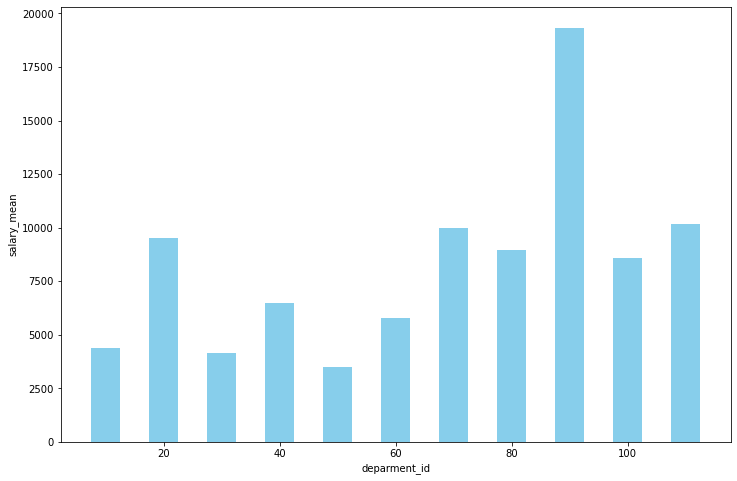

In [96]:
import matplotlib.pyplot as plt

departments = set(list(df['DEPARTMENT_ID']))
departments = sorted(list(departments)[1:])
print(departments)
department = df.groupby('DEPARTMENT_ID')
salary_means = []
for i in departments:
    department_i = department.get_group(i)
    print(i,round(department_i['SALARY'].mean()))
    salary_means.append(department_i['SALARY'].mean())
    
plt.figure(figsize = (12,8))
plt.bar(departments, salary_means, width = 5,color = 'skyblue')
plt.xlabel('deparment_id')
plt.ylabel('salary_mean')
plt.show()

[과제] PURPROD 테이블을 불러와서 다음사항을 수행하세요.


- 고객별 2014년 2015년 총구매액 및 평균구매액 출력
- 고객별 2014 VS 2015 총구매액 기준 성장율

In [103]:
con = cx_Oracle.connect('LM/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute("select 고객번호, YEAR, sum(구매금액), round(avg(구매금액),2) from PURPROD group by 고객번호, YEAR order by 고객번호")
x = cursor.fetchall()
df2 = pd.DataFrame(x,columns = ['고객번호','year','총구매금액','평균구매금액'])


,고객번호,year,총구매금액,평균구매금액
0,00001,2014.0,54041667,90979.24
1,00001,2015.0,31000883,66956.55
2,00001,NaN,85042550,80456.53
3,00002,2014.0,46245330,75812.02
4,00002,2015.0,53635430,105998.87


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58089 entries, 0 to 58088
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    58089 non-null  object 
 1   year    38706 non-null  float64
 2   총구매금액   58089 non-null  int64  
 3   평균구매금액  58089 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ MB


In [115]:
grouped = df2.groupby('year')
group2014 = grouped.get_group(2014)
print(len(group2014))
group2014.set_index(np.arange(len(group2014)),inplace=True)
group2014.head()

19338


,고객번호,year,총구매금액,평균구매금액
0,00001,2014.0,54041667,90979.24
1,00002,2014.0,46245330,75812.02
2,00003,2014.0,1893769,2562.61
3,00004,2014.0,9299616,21039.86
4,00005,2014.0,7685880,15159.53


In [114]:
group2015 = grouped.get_group(2015)
print(len(group2015))
group2015.set_index(np.arange(len(group2015)),inplace=True)
group2015.head()

19368


,고객번호,year,총구매금액,평균구매금액
0,00001,2015.0,31000883,66956.55
1,00002,2015.0,53635430,105998.87
2,00003,2015.0,1271398,2812.83
3,00004,2015.0,7394194,15152.04
4,00005,2015.0,5551190,26184.86


In [122]:
df_1415 = pd.DataFrame()
df_1415['고객번호'] = group2014['고객번호']
df_1415['14_총구매금액'] = group2014['총구매금액']
df_1415['15_총구매금액'] = group2015['총구매금액']
df_1415['14_평균구매금액'] = group2014['평균구매금액']
df_1415['15_평균구매금액'] = group2015['평균구매금액']
df_1415['구매성장율'] = (df_1415['15_총구매금액']-df_1415['14_총구매금액'])/df_1415['14_총구매금액']
df_1415

,고객번호,14_총구매금액,15_총구매금액,14_평균구매금액,15_평균구매금액,구매성장율
0,00001,54041667,31000883,90979.24,66956.55,-0.426352
1,00002,46245330,53635430,75812.02,105998.87,0.159802
2,00003,1893769,1271398,2562.61,2812.83,-0.328641
3,00004,9299616,7394194,21039.86,15152.04,-0.204893
4,00005,7685880,5551190,15159.53,26184.86,-0.277742
...,...,...,...,...,...,...
19333,19376,273297,9443651,4079.06,23433.38,33.554536
19334,19377,217360,4263560,14490.67,8630.69,18.615201
19335,19378,474760,7207202,23738.00,6618.18,14.180727
19336,19379,1190620,8464148,13685.29,4126.84,6.109026
